<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/HOML/01_Performance_Measure_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using RMSE to capture error
The lesser the better

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Target"] = housing.target

In [3]:
X = df.drop(columns=["Target"])
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [5]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [7]:
rmse
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.7456


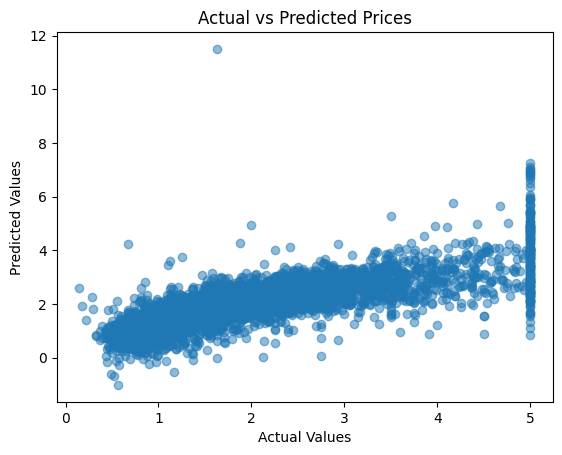

In [8]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Prices")
plt.show()

### Comparison between models

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Target"] = housing.target

# Split into training and testing sets
X = df.drop(columns=["Target"])
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [14]:
rmse_scores = {}

for model_name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_scores[model_name] = rmse
  print(f"{model_name} RMSE: {rmse:.4f}")

best_model = min(rmse_scores, key=rmse_scores.get)

Linear Regression RMSE: 0.7456
Decision Tree RMSE: 0.7028
Random Forest RMSE: 0.5051


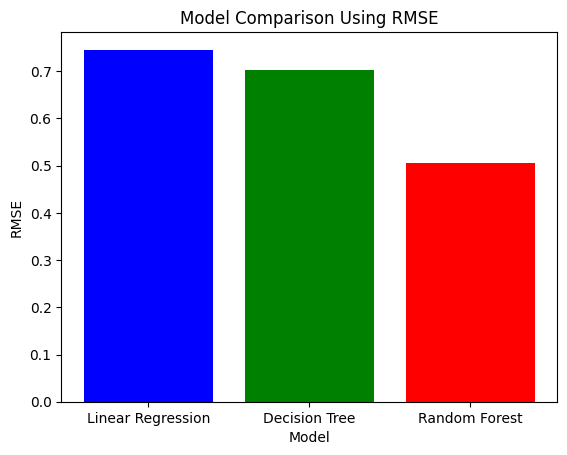

In [15]:
plt.bar(rmse_scores.keys(), rmse_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Comparison Using RMSE")
plt.show()

1. RMSE helps measure how far model predictions deviate from actual values, making it a key metric for evaluating regression models.
2. A low RMSE means the model's predictions are close to the actual values, indicating good performance.
3. A high RMSE suggests the model is making large errors, meaning it may be underfitting or unsuitable for the data.
4. If RMSE is much lower on the training set than the test set, the model is likely overfitting (memorizing training data but performing poorly on new data).
5. If RMSE improves later during model evaluation, consider hyperparameter tuning, feature engineering, or ensembling techniques to further enhance performance.

### Strategies to reduce RMSE
1. Feature engineering
2. Hyperparameter tuning, techniques like Grid Search, Random Search
3. Better data preprocessing
4. Regularization

### Example of using feature engineering and hyperparameter tuning to reduce RMSE

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Target"] = housing.target

# Split data into training and test sets
X = df.drop(columns=["Target"])
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Train a default Random Forest model
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)

# Predictions & RMSE
y_pred_baseline = rf_baseline.predict(X_test_scaled)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Baseline Random Forest RMSE: {rmse_baseline:.4f}")

Baseline Random Forest RMSE: 0.5051


In [18]:
# Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Original features: {X_train.shape[1]}, New features: {X_train_poly.shape[1]}")


Original features: 8, New features: 36


In [19]:
# Train a tuned Random Forest model
rf_tuned = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_tuned.fit(X_train_poly, y_train)

# Predictions & RMSE
y_pred_tuned = rf_tuned.predict(X_test_poly)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Tuned Random Forest RMSE (with feature engineering): {rmse_tuned:.4f}")


Tuned Random Forest RMSE (with feature engineering): 0.5469


In [21]:
rf_basic_with_poly = RandomForestRegressor(random_state=42)
rf_basic_with_poly.fit(X_train_poly, y_train)

y_pred_basic_with_poly = rf_basic_with_poly.predict(X_test_poly)
rmse_basic_with_poly = np.sqrt(mean_squared_error(y_test, y_pred_basic_with_poly))

print(f"Basic Random Forest RMSE (with feature engineering): {rmse_basic_with_poly:.4f}")

Basic Random Forest RMSE (with feature engineering): 0.5148


In [23]:
rf_tuned_with_basic_data = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_tuned_with_basic_data.fit(X_train_scaled, y_train)

y_pred_tuned_with_basic_data = rf_tuned_with_basic_data.predict(X_test_scaled)
rmse_tuned_with_basic_data = np.sqrt(mean_squared_error(y_test, y_pred_tuned_with_basic_data))

print(f"Tuned Random Forest RMSE (with basic data): {rmse_tuned_with_basic_data:.4f}")

Tuned Random Forest RMSE (with basic data): 0.5433


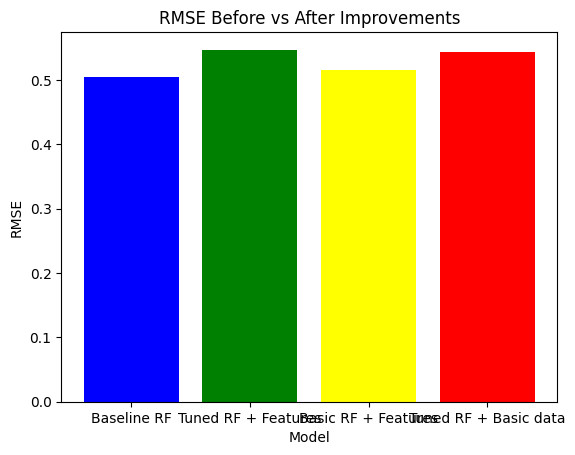

In [25]:
# Compare results
models = ["Baseline RF", "Tuned RF + Features", "Basic RF + Features", "Tuned RF + Basic data"]
rmse_values = [rmse_baseline, rmse_tuned, rmse_basic_with_poly, rmse_tuned_with_basic_data]

plt.bar(models, rmse_values, color=['blue', 'green', 'yellow', 'red'])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Before vs After Improvements")
plt.show()
